## This notebook will contain some simple visuals to get insights of the initial data. 

In [ ]:
%pip install seaborn

In [1]:
#Importing the necessary libraries
import sys
from pathlib import Path
import subprocess
from glob import glob
import matplotlib

import numpy as np
import pandas as pd
import polars as pl
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

import math

import gc

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

dataPath = '/Users/artjolameli/Desktop/credit_risk_project/machine-learning-dse-i210-final-project-credit-risk/data/raw/parquet_files/train'

## Checking the size of the dataset

The following cell is used to check the size of each dataframe for both training set and test set. 
- The largest one in training set is *credit_bureau_a_2_5* which takes 2.9G 
- *applprev_1_2, credit_bureau_a_1_4, credit_bureau_a_2_11, static_0_2* are absent in the training set, so these df should not be included while training the model.

In [2]:
# Load and merge the files

train_basetable = pl.read_parquet(dataPath + "/train_base.parquet")

train_applprev_1_0 = pl.read_parquet(dataPath + "/train_applprev_1_0.parquet")
train_applprev_1_1 = pl.read_parquet(dataPath + "/train_applprev_1_1.parquet")
train_applprev_2 = pl.read_parquet(dataPath + "/train_applprev_2.parquet")
train_credit_bureau_a_1_0 = pl.read_parquet(dataPath + "/train_credit_bureau_a_1_0.parquet")
train_credit_bureau_a_1_1 = pl.read_parquet(dataPath + "/train_credit_bureau_a_1_1.parquet")
train_credit_bureau_a_1_2 = pl.read_parquet(dataPath + "/train_credit_bureau_a_1_2.parquet")
train_credit_bureau_a_1_3 = pl.read_parquet(dataPath + "/train_credit_bureau_a_1_3.parquet")
train_credit_bureau_a_2_0 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_0.parquet")
train_credit_bureau_a_2_1 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_1.parquet")
train_credit_bureau_a_2_2 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_2.parquet")
train_credit_bureau_a_2_3 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_3.parquet")
train_credit_bureau_a_2_4 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_4.parquet")
train_credit_bureau_a_2_5 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_5.parquet")
train_credit_bureau_a_2_6 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_6.parquet")
train_credit_bureau_a_2_7 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_7.parquet")
train_credit_bureau_a_2_8 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_8.parquet")
train_credit_bureau_a_2_9 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_9.parquet")
train_credit_bureau_a_2_10 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_10.parquet")
train_credit_bureau_b_1 = pl.read_parquet(dataPath + "/train_credit_bureau_b_1.parquet")
train_credit_bureau_b_2 = pl.read_parquet(dataPath + "/train_credit_bureau_b_2.parquet")
train_debitcard_1 = pl.read_parquet(dataPath + "/train_debitcard_1.parquet")
train_deposit_1 = pl.read_parquet(dataPath + "/train_deposit_1.parquet")
train_other_1 = pl.read_parquet(dataPath + "/train_other_1.parquet")
train_person_1 = pl.read_parquet(dataPath + "/train_person_1.parquet")
train_person_2 = pl.read_parquet(dataPath + "/train_person_2.parquet")
train_static_0_0 = pl.read_parquet(dataPath + "/train_static_0_0.parquet")
train_static_0_1 = pl.read_parquet(dataPath + "/train_static_0_1.parquet")
train_static_cb_0 = pl.read_parquet(dataPath + "/train_static_cb_0.parquet")
train_tax_registry_a_1 = pl.read_parquet(dataPath + "/train_tax_registry_a_1.parquet")
train_tax_registry_b_1 = pl.read_parquet(dataPath + "/train_tax_registry_b_1.parquet")
train_tax_registry_c_1 = pl.read_parquet(dataPath + "/train_tax_registry_c_1.parquet")

In [5]:
# Overview and statistics for each DataFrame
dataframes = {
    'train_applprev_1_0': train_applprev_1_0,
    'train_applprev_1_1': train_applprev_1_1,
    'train_applprev_2': train_applprev_2,
    'train_credit_bureau_a_1_0': train_credit_bureau_a_1_0,
    'train_credit_bureau_a_1_1': train_credit_bureau_a_1_1,
    'train_credit_bureau_a_1_2': train_credit_bureau_a_1_2,
    'train_credit_bureau_a_1_3': train_credit_bureau_a_1_3,
    'train_credit_bureau_a_2_0': train_credit_bureau_a_2_0,
    'train_credit_bureau_a_2_1': train_credit_bureau_a_2_1,
    'train_credit_bureau_a_2_2': train_credit_bureau_a_2_2,
    'train_credit_bureau_a_2_3': train_credit_bureau_a_2_3,
    'train_credit_bureau_a_2_4': train_credit_bureau_a_2_4,
    'train_credit_bureau_a_2_5': train_credit_bureau_a_2_5,
    'train_credit_bureau_a_2_6': train_credit_bureau_a_2_6,
    'train_credit_bureau_a_2_7': train_credit_bureau_a_2_7,
    'train_credit_bureau_a_2_8': train_credit_bureau_a_2_8,
    'train_credit_bureau_a_2_9': train_credit_bureau_a_2_9,
    'train_credit_bureau_a_2_10': train_credit_bureau_a_2_10,
    'train_credit_bureau_b_1': train_credit_bureau_b_1,
    'train_credit_bureau_b_2': train_credit_bureau_b_2,
    'train_debitcard_1': train_debitcard_1,
    'train_deposit_1': train_deposit_1,
    'train_person_1': train_person_1,
    'train_person_2': train_person_2,
    'train_static_0_0': train_static_0_0,
    'train_static_0_1': train_static_0_1,
    'train_static_cb_0': train_static_cb_0,
    'train_tax_registry_a_1': train_tax_registry_a_1,
    'train_tax_registry_b_1': train_tax_registry_b_1,
    'train_tax_registry_c_1': train_tax_registry_c_1
}

In [6]:
for name, df in dataframes.items():
    print(f"Overview of {name}:")
    # Print the schema for an overview of the DataFrame structure
    print(df.schema)
    
    # Get a summary of the data
    print(df.describe())

    print("\nMissing values count in each column:")
    # Count missing values in each column
    missing_values = df.select([pl.col(column).is_null().sum().alias(column) for column in df.columns])
    print(missing_values)

    print("\n-----\n")

Overview of train_applprev_1_0:
OrderedDict([('case_id', Int64), ('actualdpd_943P', Float64), ('annuity_853A', Float64), ('approvaldate_319D', String), ('byoccupationinc_3656910L', Float64), ('cancelreason_3545846M', String), ('childnum_21L', Float64), ('creationdate_885D', String), ('credacc_actualbalance_314A', Float64), ('credacc_credlmt_575A', Float64), ('credacc_maxhisbal_375A', Float64), ('credacc_minhisbal_90A', Float64), ('credacc_status_367L', String), ('credacc_transactions_402L', Float64), ('credamount_590A', Float64), ('credtype_587L', String), ('currdebt_94A', Float64), ('dateactivated_425D', String), ('district_544M', String), ('downpmt_134A', Float64), ('dtlastpmt_581D', String), ('dtlastpmtallstes_3545839D', String), ('education_1138M', String), ('employedfrom_700D', String), ('familystate_726L', String), ('firstnonzeroinstldate_307D', String), ('inittransactioncode_279L', String), ('isbidproduct_390L', Boolean), ('isdebitcard_527L', Boolean), ('mainoccupationinc_437A',

## Basetable 
##### Basetable stores the basic information about the observation and case_id. This is a unique identification of every observation and it is needed to use it to join the other tables to base tables.

In [7]:
train_basetable.head()

case_id,date_decision,MONTH,WEEK_NUM,target
i64,str,i64,i64,i64
0,"""2019-01-03""",201901,0,0
1,"""2019-01-03""",201901,0,0
2,"""2019-01-04""",201901,0,0
3,"""2019-01-03""",201901,0,0
4,"""2019-01-04""",201901,0,1


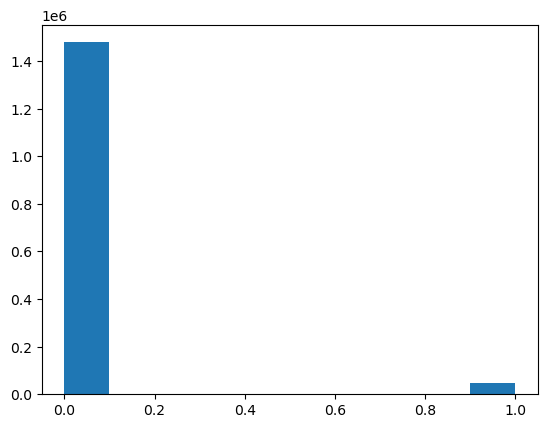

In [8]:
plt.hist(train_basetable['target'])
plt.show()

In [9]:
zeroes_ratio = train_basetable.filter(pl.col('target') == False).count()['target'][0] / train_basetable.shape[0]
zeroes_ratio

0.9685627242232876

This means that zero lines should be given less weight during training.

In [10]:
train_basetable = train_basetable.with_columns(
    date_decision_upd=pl.col("date_decision").str.to_datetime()
)

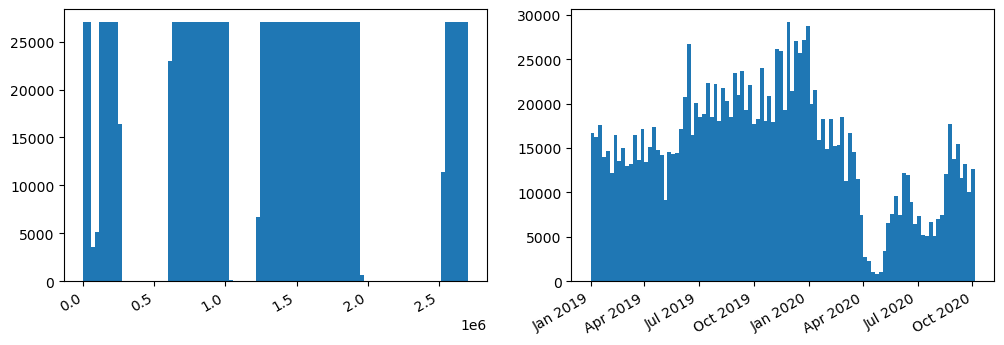

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(train_basetable['case_id'], bins=100)
axes[1].hist(train_basetable['date_decision_upd'], bins=100)
axes[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
fig.autofmt_xdate()
plt.show()

The ID people are distributed very strangely, maybe this should be given some attention. It is also clear that for April 2020 there is the least amount of data. Around this time, Covid began and there was a general decline in the economy, which is also worth remembering.

Total data for a period of 1 year 9 months

#### Target
Target is defined as whether or not the client defaulted on the specific credit case.
As we can see are are dealing with a highly imbalanced dataset

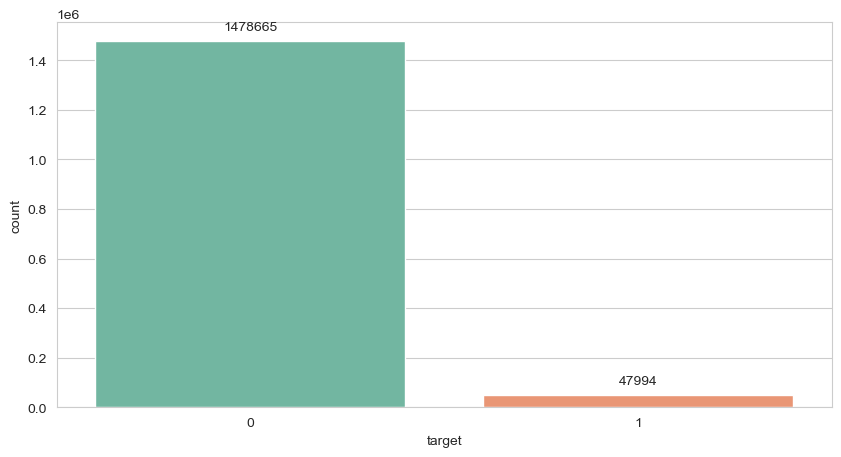

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

# First subplot: Count plot of 'target'
plt.plot(2,1)
ax = sns.countplot(data=train_basetable, x='target', palette="Set2")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

(0.0, 2000.0)

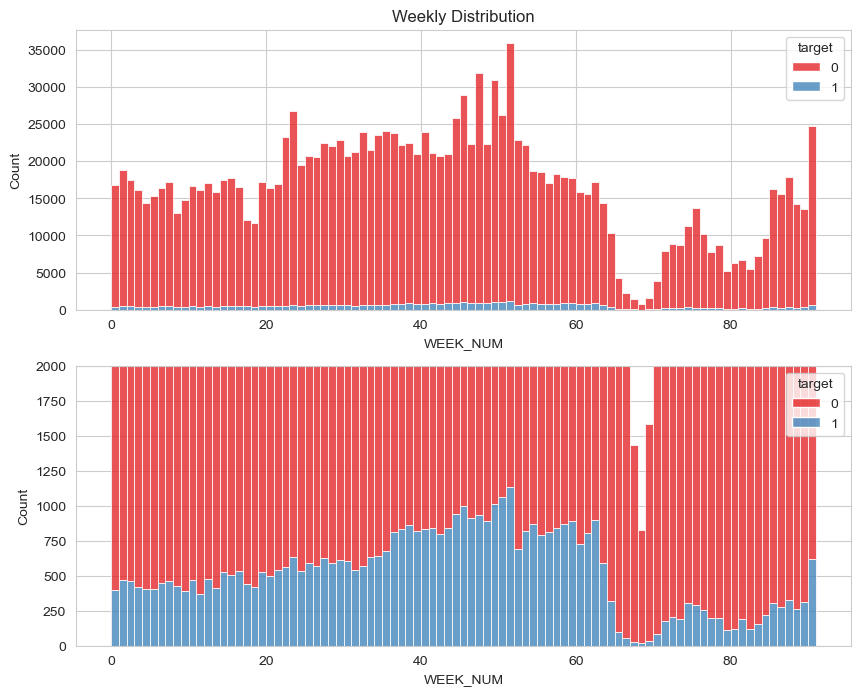

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(data=train_basetable, x='WEEK_NUM', hue="target", binwidth=1, multiple="stack", palette="Set1")
plt.title("Weekly Distribution")

plt.subplot(2,1,2)
sns.histplot(data=train_basetable, x='WEEK_NUM', hue="target", binwidth=1, multiple="stack", palette="Set1")
plt.ylim(0,2000)

## Personal Data

#### Lets get a glimpse of the personal data and build some visualizations

In [25]:
train_person_1.head()

case_id,birth_259D,birthdate_87D,childnum_185L,contaddr_district_15M,contaddr_matchlist_1032L,contaddr_smempladdr_334L,contaddr_zipcode_807M,education_927M,empl_employedfrom_271D,empl_employedtotal_800L,empl_industry_691L,empladdr_district_926M,empladdr_zipcode_114M,familystate_447L,gender_992L,housetype_905L,housingtype_772L,incometype_1044T,isreference_387L,language1_981M,mainoccupationinc_384A,maritalst_703L,num_group1,personindex_1023L,persontype_1072L,persontype_792L,registaddr_district_1083M,registaddr_zipcode_184M,relationshiptoclient_415T,relationshiptoclient_642T,remitter_829L,role_1084L,role_993L,safeguarantyflag_411L,sex_738L,type_25L
i64,str,str,f64,str,bool,bool,str,str,str,str,str,str,str,str,str,str,str,str,bool,str,f64,str,i64,f64,f64,f64,str,str,str,str,bool,str,str,bool,str,str
0,"""1986-07-01""",null,null,"""P88_18_84""",false,false,"""P167_100_165""","""P97_36_170""","""2017-09-15""","""MORE_FIVE""","""OTHER""","""P142_57_166""","""P167_100_165""","""MARRIED""",null,null,null,"""SALARIED_GOVT""",null,"""P10_39_147""",10800.0,null,0,0.0,1.0,1.0,"""P88_18_84""","""P167_100_165""",null,null,null,"""CL""",null,true,"""F""","""PRIMARY_MOBILE"""
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,1,1.0,1.0,4.0,"""a55475b1""","""a55475b1""","""SPOUSE""",null,false,"""EM""",null,null,null,"""PHONE"""
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,2,2.0,4.0,5.0,"""a55475b1""","""a55475b1""","""COLLEAGUE""","""SPOUSE""",false,"""PE""",null,null,null,"""PHONE"""
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,3,null,5.0,null,"""a55475b1""","""a55475b1""",null,"""COLLEAGUE""",null,"""PE""",null,null,null,"""PHONE"""
1,"""1957-08-01""",null,null,"""P103_93_94""",false,false,"""P176_37_166""","""P97_36_170""","""2008-10-29""","""MORE_FIVE""","""OTHER""","""P49_46_174""","""P160_59_140""","""DIVORCED""",null,null,null,"""SALARIED_GOVT""",null,"""P10_39_147""",10000.0,null,0,0.0,1.0,1.0,"""P103_93_94""","""P176_37_166""",null,null,null,"""CL""",null,true,"""M""","""PRIMARY_MOBILE"""


In [26]:
train_person_1.describe()

statistic,case_id,birth_259D,birthdate_87D,childnum_185L,contaddr_district_15M,contaddr_matchlist_1032L,contaddr_smempladdr_334L,contaddr_zipcode_807M,education_927M,empl_employedfrom_271D,empl_employedtotal_800L,empl_industry_691L,empladdr_district_926M,empladdr_zipcode_114M,familystate_447L,gender_992L,housetype_905L,housingtype_772L,incometype_1044T,isreference_387L,language1_981M,mainoccupationinc_384A,maritalst_703L,num_group1,personindex_1023L,persontype_1072L,persontype_792L,registaddr_district_1083M,registaddr_zipcode_184M,relationshiptoclient_415T,relationshiptoclient_642T,remitter_829L,role_1084L,role_993L,safeguarantyflag_411L,sex_738L,type_25L
str,f64,str,str,f64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,f64,str,f64,f64,f64,f64,str,str,str,str,f64,str,str,f64,str,str
"""count""",2.973991e6,"""1526659""","""24916""",9907.0,"""2973991""",1.526218e6,1.526218e6,"""2973991""","""2973991""","""566701""","""528315""","""522236""","""2973991""","""2973991""","""728613""","""24916""","""100818""","""9815""","""1526659""",24916.0,"""2973991""",1.526659e6,"""11345""",2.973991e6,2.331708e6,2.967874e6,2.331708e6,"""2973991""","""2973991""","""805049""","""805942""",805049.0,"""2967874""","""24916""",1.526657e6,"""1526659""","""2967874"""
"""null_count""",0.0,"""1447332""","""2949075""",2.964084e6,"""0""",1.447773e6,1.447773e6,"""0""","""0""","""2407290""","""2445676""","""2451755""","""0""","""0""","""2245378""","""2949075""","""2873173""","""2964176""","""1447332""",2.949075e6,"""0""",1.447332e6,"""2962646""",0.0,642283.0,6117.0,642283.0,"""0""","""0""","""2168942""","""2168049""",2.168942e6,"""6117""","""2949075""",1.447334e6,"""1447332""","""6117"""
"""mean""",1.0552e6,null,null,0.616029,null,0.0,0.004542,null,null,null,null,null,null,null,null,null,null,null,null,0.5,null,57707.483462,null,0.796532,0.438357,2.034862,2.315691,null,null,null,null,0.0,null,null,0.946555,null,null
"""std""",724571.385118,null,null,0.96608,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,33348.302845,null,0.977789,0.659662,1.707171,1.826378,null,null,null,null,null,null,null,null,null,null
"""min""",0.0,"""1943-03-01""","""1911-12-01""",0.0,"""P0_111_121""",0.0,0.0,"""P0_101_75""","""P106_81_188""","""1963-06-15""","""LESS_ONE""","""AGRICULTURE""","""P0_140_162""","""P0_101_75""","""DIVORCED""","""F""","""COMPANY_FLAT""","""COMPANY_FLAT""","""EMPLOYED""",0.0,"""P10_39_147""",0.0,"""DIVORCED""",0.0,0.0,1.0,1.0,"""P0_111_121""","""P0_101_75""","""CHILD""","""CHILD""",0.0,"""CL""","""FULL""",0.0,"""F""","""ALTERNATIVE_PHONE"""
"""25%""",637354.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,36000.0,null,0.0,0.0,1.0,1.0,null,null,null,null,null,null,null,null,null,null
"""50%""",890817.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,50000.0,null,0.0,0.0,1.0,1.0,null,null,null,null,null,null,null,null,null,null
"""75%""",1.568334e6,null,null,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,70000.0,null,1.0,1.0,4.0,5.0,null,null,null,null,null,null,null,null,null,null
"""max""",2.703454e6,"""1999-10-01""","""2015-12-01""",11.0,"""a55475b1""",0.0,1.0,"""a55475b1""","""a55475b1""","""2020-09-15""","""MORE_ONE""","""WELNESS""","""a55475b1""","""a55475b1""","""WIDOWED""","""M""","""STATE_FLAT""","""STATE_FLAT""","""SELFEMPLOYED""",1.0,"""a55475b1""",200000.0,"""WIDOWED""",9.0,6.0,5.0,5.0,"""a55475b1""","""a55475b1""","""SPOUSE""","""SPOUSE""",0.0,"""PE""","""FULL""",1.0,"""M""","""WHATSAPP"""


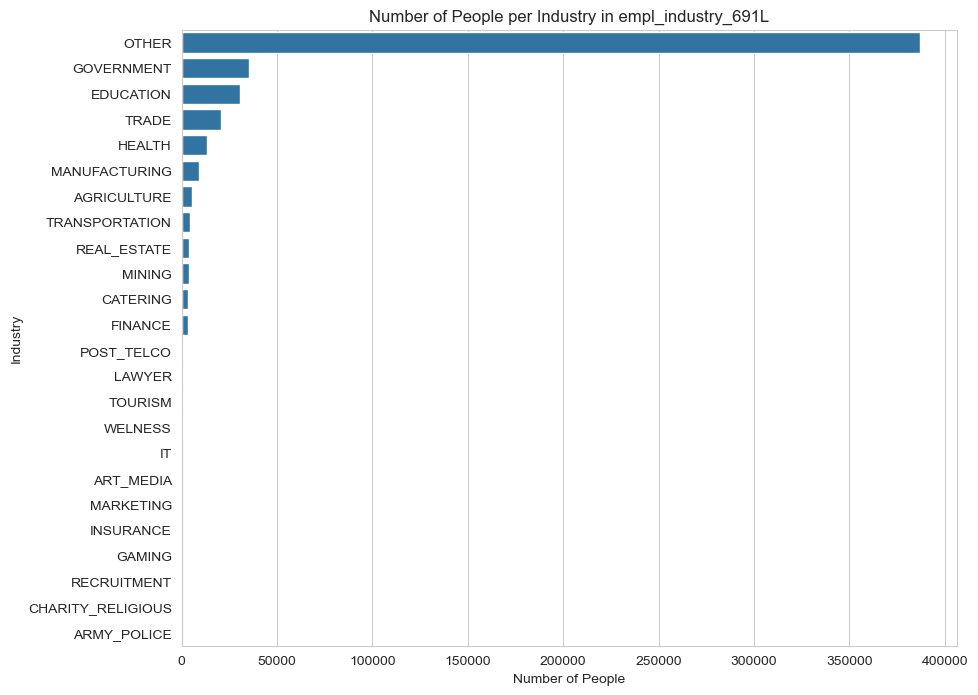

In [27]:
# Count the number of occurrences for each industry
industry_counts = train_person_1.groupby('empl_industry_691L').agg(pl.count().alias('count'))

# Convert to Pandas DataFrame for easier plotting
industry_counts_df = industry_counts.to_pandas()

# Sorting the data for better visualization
industry_counts_df = industry_counts_df.sort_values(by='count', ascending=False)

# Plotting using seaborn for a cleaner interface
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.barplot(data=industry_counts_df, x='count', y='empl_industry_691L')
plt.title('Number of People per Industry in empl_industry_691L')
plt.xlabel('Number of People')
plt.ylabel('Industry')
plt.show()

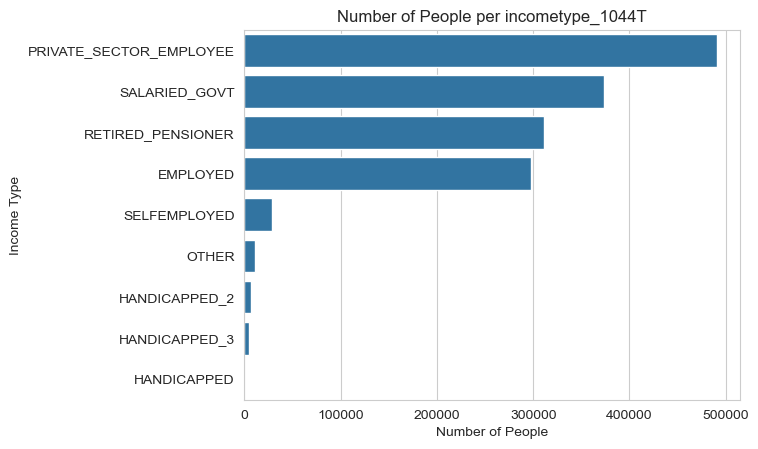

In [28]:
# Count the number of occurrences for each industry
income_type = train_person_1.groupby('incometype_1044T').agg(pl.count().alias('count'))

# Convert to Pandas DataFrame for easier plotting
income_type_df = income_type.to_pandas()

# Sorting the data for better visualization
income_type_df = income_type_df.sort_values(by='count', ascending=False)

# Plotting using seaborn for a cleaner interface
sns.barplot(data=income_type_df, x='count', y='incometype_1044T')
plt.title('Number of People per incometype_1044T')
plt.xlabel('Number of People')
plt.ylabel('Income Type')
plt.show()

In [29]:
train_person_2.head()

case_id,addres_district_368M,addres_role_871L,addres_zip_823M,conts_role_79M,empls_economicalst_849M,empls_employedfrom_796D,empls_employer_name_740M,num_group1,num_group2,relatedpersons_role_762T
i64,str,str,str,str,str,str,str,i64,i64,str
5,"""a55475b1""",null,"""a55475b1""","""a55475b1""","""a55475b1""",null,"""a55475b1""",0,0,null
6,"""P55_110_32""","""CONTACT""","""P10_68_40""","""P38_92_157""","""P164_110_33""",null,"""a55475b1""",0,0,null
6,"""P55_110_32""","""PERMANENT""","""P10_68_40""","""a55475b1""","""a55475b1""",null,"""a55475b1""",0,1,null
6,"""P204_92_178""","""CONTACT""","""P65_136_169""","""P38_92_157""","""P164_110_33""",null,"""a55475b1""",1,0,"""OTHER_RELATIVE"""
6,"""P191_109_75""","""CONTACT""","""P10_68_40""","""P7_147_157""","""a55475b1""",null,"""a55475b1""",1,1,"""OTHER_RELATIVE"""


Distributions of Address Roles

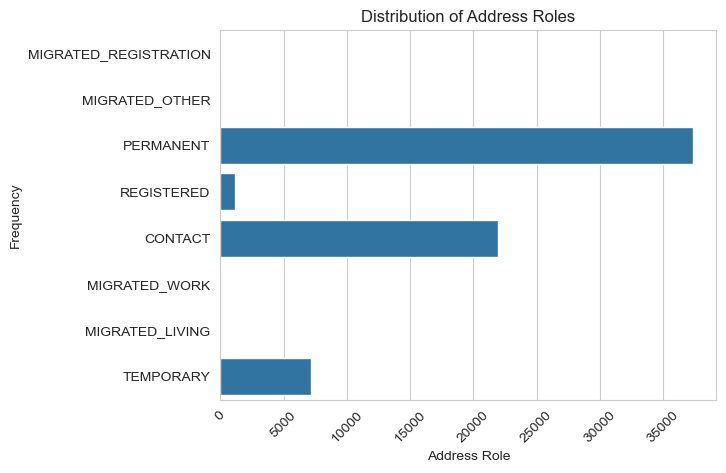

In [30]:
# Count the number of occurrences for each address
address_role = train_person_2.groupby('addres_role_871L').agg(pl.count().alias('count'))

# Convert to Pandas DataFrame for easier plotting
address_role_counts = address_role.to_pandas()

sns.barplot(data=address_role_counts, x='count', y='addres_role_871L')
plt.xlabel('Address Role')
plt.ylabel('Frequency')
plt.title('Distribution of Address Roles')
plt.xticks(rotation=45)
plt.show()

## Tax Registry Files

Included:
train_tax_registry_a_1
train_tax_registry_b_1
train_tax_registry_c_1

In [31]:
train_tax_registry_a_1.head()

case_id,amount_4527230A,name_4527232M,num_group1,recorddate_4527225D
i64,f64,str,i64,str
28631,711.0,"""f980a1ea""",3,"""2019-09-13"""
28631,1946.0,"""f980a1ea""",2,"""2019-09-13"""
28631,2600.0,"""f980a1ea""",1,"""2019-09-13"""
28631,3616.4001,"""f980a1ea""",0,"""2019-09-13"""
28632,400.0,"""5f9b74f5""",6,"""2019-09-13"""


In [32]:
train_tax_registry_b_1.head()

case_id,amount_4917619A,deductiondate_4917603D,name_4917606M,num_group1
i64,f64,str,str,i64
49435,6885.0,"""2019-10-16""","""6b730375""",0
49435,6885.0,"""2019-10-16""","""6b730375""",1
49435,6885.0,"""2019-10-16""","""6b730375""",2
49435,6885.0,"""2019-10-16""","""6b730375""",3
49435,6885.0,"""2019-10-16""","""6b730375""",4


In [33]:
train_tax_registry_c_1.head()

case_id,employername_160M,num_group1,pmtamount_36A,processingdate_168D
i64,str,i64,f64,str
357,"""c91b12ff""",0,1200.0,"""2019-01-04"""
357,"""c91b12ff""",1,1200.0,"""2018-11-28"""
357,"""c91b12ff""",2,972.8,"""2018-11-01"""
357,"""c91b12ff""",3,628.60004,"""2018-10-08"""
357,"""c91b12ff""",4,1200.0,"""2018-09-10"""


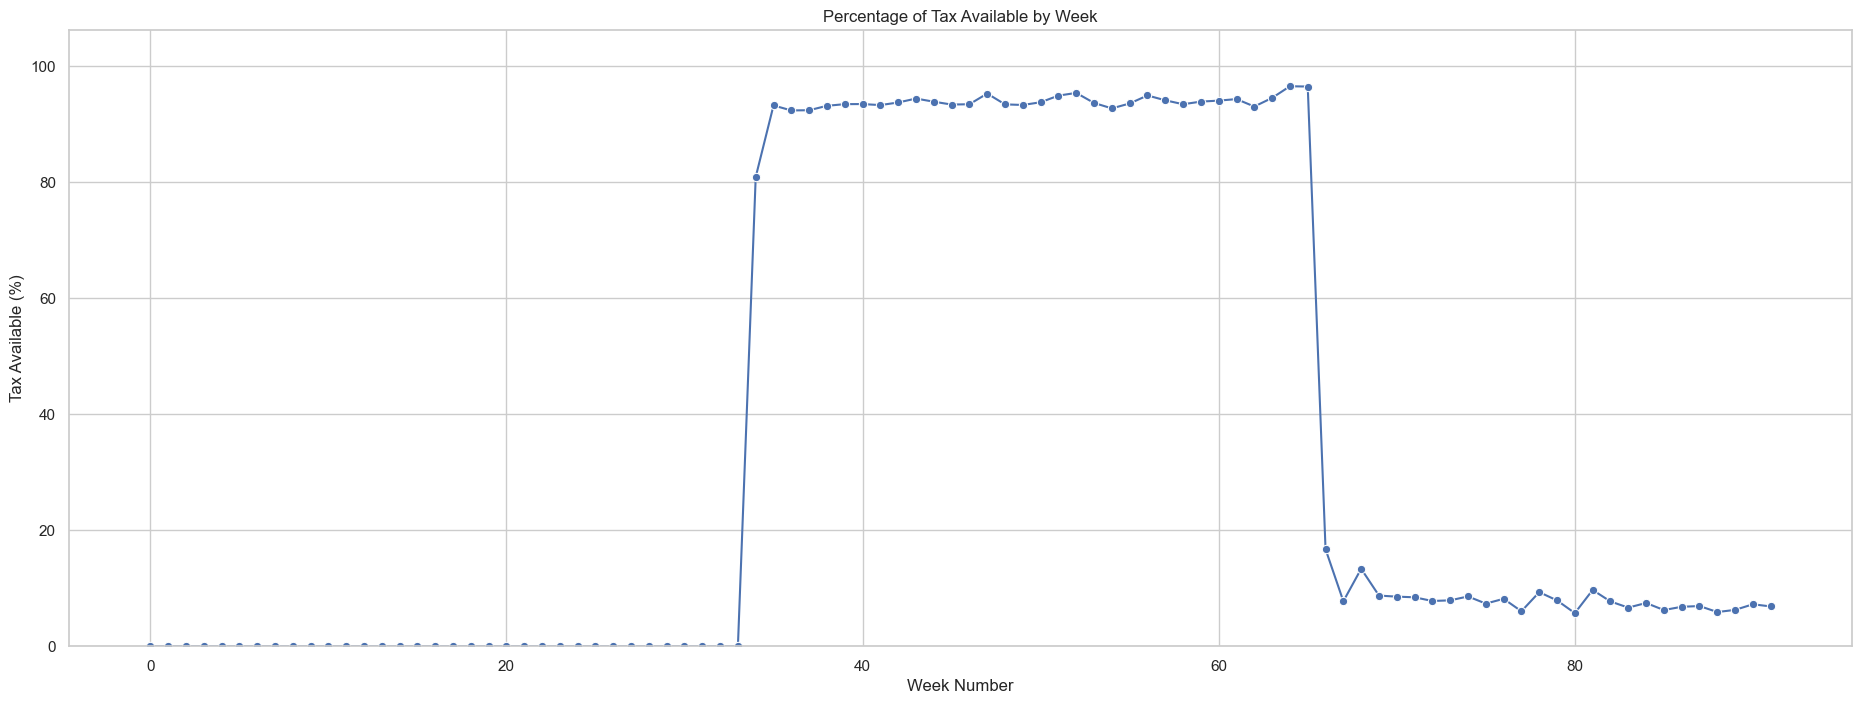

In [34]:
tax_df_a = train_basetable.select(["case_id", "WEEK_NUM"]).join(
    train_tax_registry_a_1, how="left", on="case_id"
).to_pandas()

# Get number of entries by week
tax_df_grouped_a = tax_df_a.groupby(
    "WEEK_NUM", as_index=False
).count().rename(columns={"case_id": "n_cases"})

# Calculating the percentage of tax_available as of n_cases
tax_df_grouped_a["tax_available"] = (
    tax_df_grouped_a["amount_4527230A"] / tax_df_grouped_a["n_cases"]
) * 100

sns.set(style="whitegrid")

# Plotting directly using seaborn for a line plot
plt.figure(figsize=(23, 8))  # Set the figure size for better readability
sns.lineplot(data=tax_df_grouped_a, x='WEEK_NUM', y='tax_available', marker='o')  # Create a line plot with markers

# Adding title and labels
plt.title('Percentage of Tax Available by Week')
plt.xlabel('Week Number')
plt.ylabel('Tax Available (%)')

# Optionally, you can customize the limits and the look of your plot
plt.ylim(0, tax_df_grouped_a['tax_available'].max() * 1.1)  # Setting y-axis limit slightly higher than max for better display

# Display the plot
plt.show()

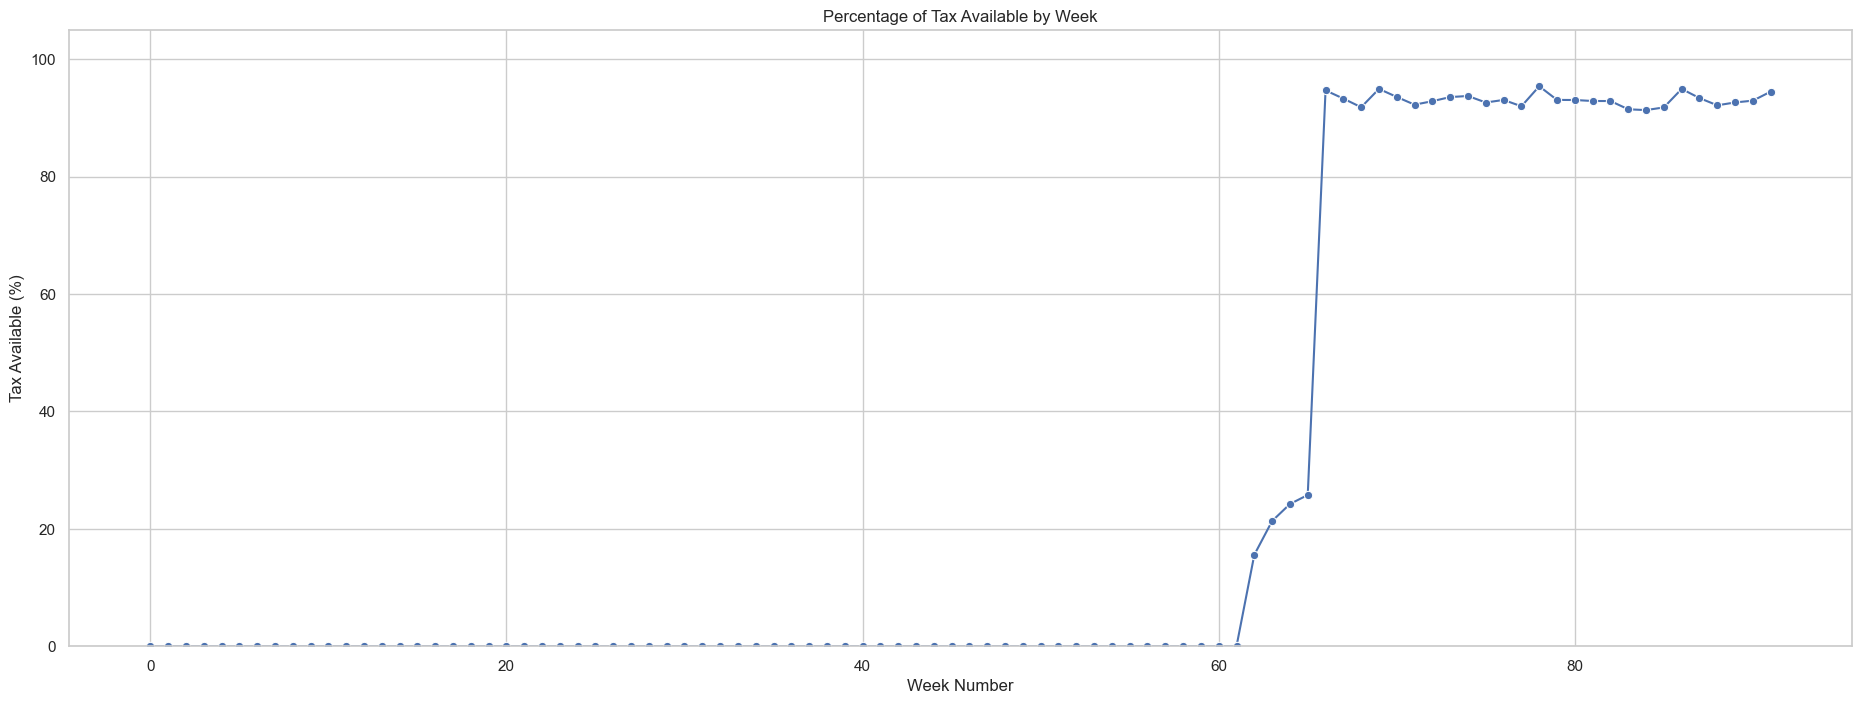

In [35]:
# Ensure that both dataframes are Polars DataFrames
if isinstance(train_basetable, pd.DataFrame):
    train_basetable = pl.from_pandas(train_basetable)
if isinstance(train_tax_registry_b_1, pd.DataFrame):
    train_tax_registry_b_1 = pl.from_pandas(train_tax_registry_b_1)

# Now perform the join
tax_df_b = train_basetable.select(["case_id", "WEEK_NUM"]).join(
    train_tax_registry_b_1, how="left", on="case_id"
).to_pandas()

# Continue with your code
tax_df_grouped_b = tax_df_b.groupby(
    "WEEK_NUM", as_index=False
).count().rename(columns={"case_id": "n_cases"})

tax_df_grouped_b["tax_available"] = (
    tax_df_grouped_b["amount_4917619A"] / tax_df_grouped_b["n_cases"]
) * 100

sns.set(style="whitegrid")

plt.figure(figsize=(23, 8))  
sns.lineplot(data=tax_df_grouped_b, x='WEEK_NUM', y='tax_available', marker='o')

plt.title('Percentage of Tax Available by Week')
plt.xlabel('Week Number')
plt.ylabel('Tax Available (%)')

plt.ylim(0, tax_df_grouped_b['tax_available'].max() * 1.1)  

plt.show()

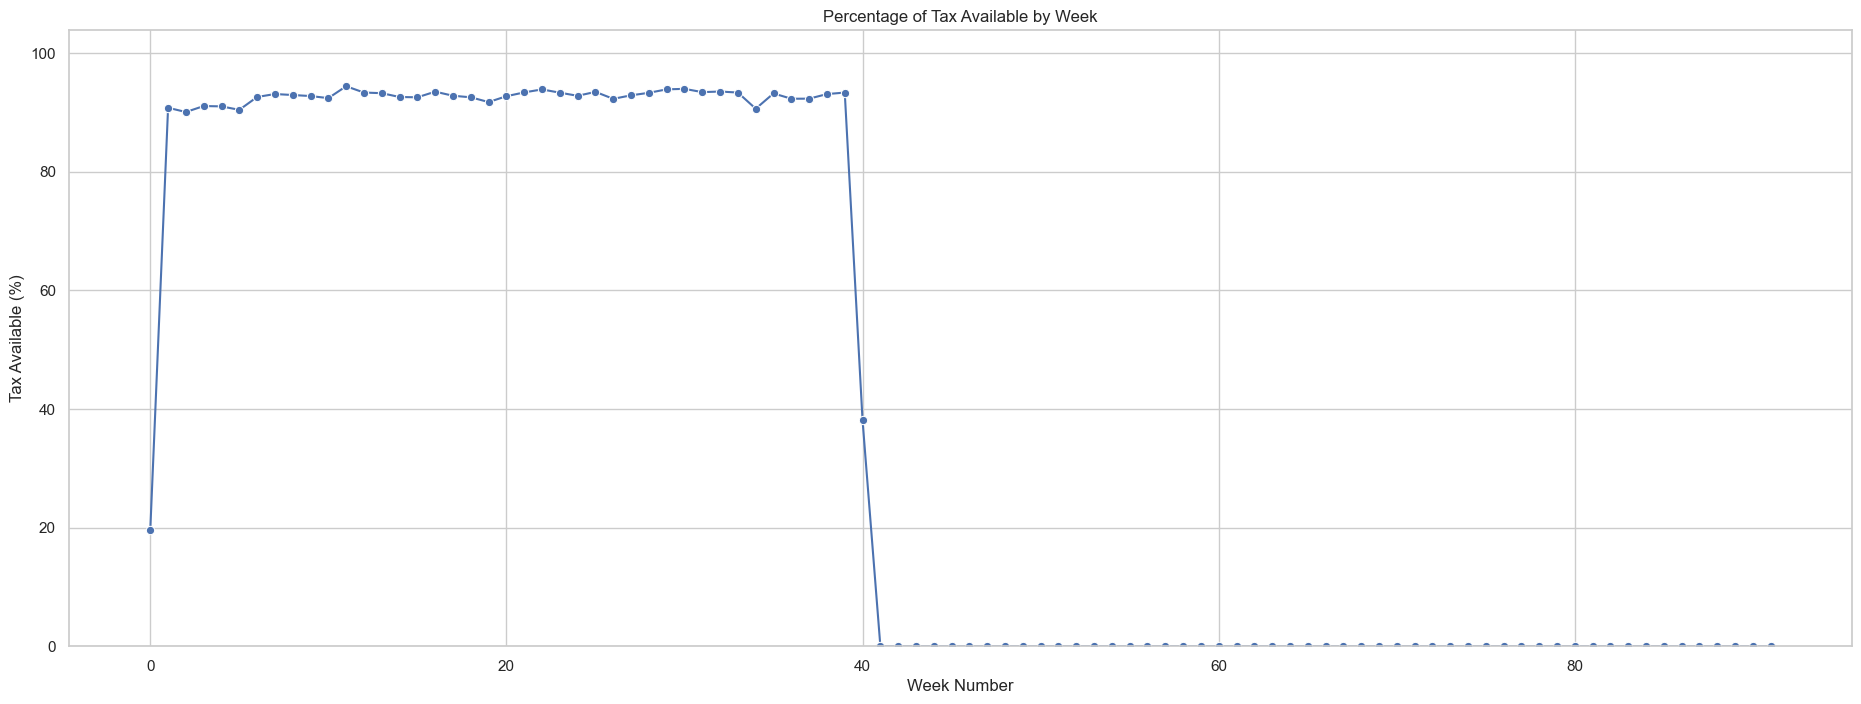

In [36]:
tax_df_c = train_basetable.select(["case_id", "WEEK_NUM"]).join(
    train_tax_registry_c_1, how="left", on="case_id"
).to_pandas()

# Get number of entries by week
tax_df_grouped_c = tax_df_c.groupby(
    "WEEK_NUM", as_index=False
).count().rename(columns={"case_id": "n_cases"})

# Calculating the percentage of tax_available as of n_cases
tax_df_grouped_c["tax_available"] = (
    tax_df_grouped_c["pmtamount_36A"] / tax_df_grouped_c["n_cases"]
) * 100

sns.set(style="whitegrid")

# Plotting directly using seaborn for a line plot
plt.figure(figsize=(23, 8))  # Set the figure size for better readability
sns.lineplot(data=tax_df_grouped_c, x='WEEK_NUM', y='tax_available', marker='o')  # Create a line plot with markers

# Adding title and labels
plt.title('Percentage of Tax Available by Week')
plt.xlabel('Week Number')
plt.ylabel('Tax Available (%)')

# Optionally, you can customize the limits and the look of your plot
plt.ylim(0, tax_df_grouped_c['tax_available'].max() * 1.1)  # Setting y-axis limit slightly higher than max for better display

# Display the plot
plt.show()